In [14]:
import time
import random
from k_merge_dyc import k_merge_dyc
from k_merge_heap import k_merge_heap
import matplotlib.pyplot as plt

In [15]:
CANTIDAD_ELEMENTOS_MAXIMA = 100
CANTIDAD_LISTAS = 100
NUMERO_MAXIMO = 999
SALTOS = 10

In [16]:
def armar_lista_aleatorias(cant_listas, cant_digitos):
    lista_de_listas = []
    for i in range(cant_listas):
        lista_aux = []
        for j in range(cant_digitos):
            nro_random = random.randint(0,NUMERO_MAXIMO)
            lista_aux.append(nro_random)
        lista_aux.sort()
        lista_de_listas.append(lista_aux)
    return lista_de_listas

In [17]:
def armar_lista_volumen(cant_listas, cant_digitos):
    lista_de_listas = []
    contador = 0
    for i in range(cant_listas):
        lista_aux = []
        for j in range(cant_digitos):
            lista_aux.append(contador)
            contador += 1
        lista_de_listas.append(lista_aux)
    return lista_de_listas

In [18]:
def obtener_tiempos_h_variable(cantidades, n_listas, k_merge, armar_lista):
    tiempos = []
    for cant in cantidades:
        listas = armar_lista(n_listas, cant)
        start_time = time.time()
        k_merge(listas)  
        end_time = time.time()
        tiempos.append(end_time - start_time)  
    
    return tiempos

In [19]:
cantidad_elementos_maxima = 100
n_listas = 300
saltos = 10

cantidades = [i for i in range(0, cantidad_elementos_maxima, saltos)]

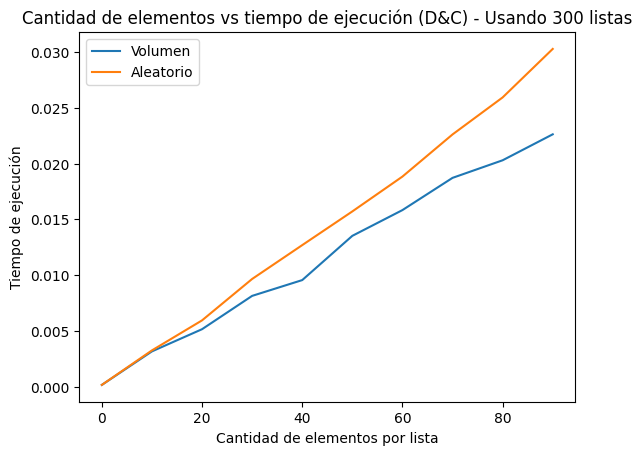

In [20]:
tiempos_dyc_volumen = obtener_tiempos_h_variable(cantidades, n_listas, k_merge_dyc, armar_lista_volumen)
tiempos_dyc_aleatorio = obtener_tiempos_h_variable(cantidades, n_listas, k_merge_dyc, armar_lista_aleatorias)

plt.plot(cantidades, tiempos_dyc_volumen, label='Volumen')
plt.plot(cantidades, tiempos_dyc_aleatorio, label='Aleatorio')
plt.title(f'Cantidad de elementos vs tiempo de ejecución (D&C) - Usando {n_listas} listas')
plt.xlabel('Cantidad de elementos por lista')
plt.ylabel('Tiempo de ejecución')
plt.legend()
plt.show()


Creando listas fijas usando heap

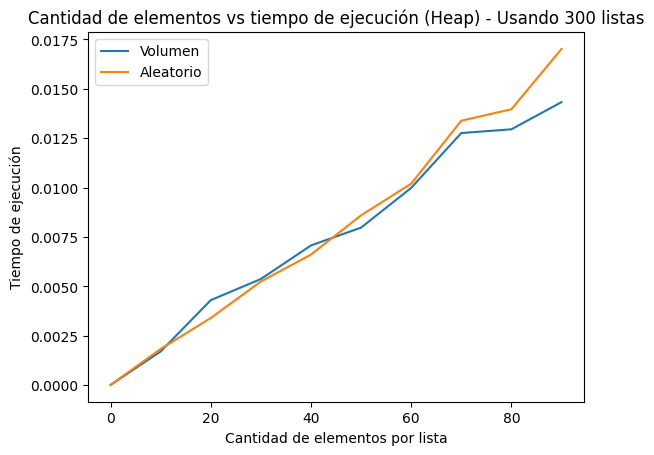

In [21]:
tiempos_heap_volumen = obtener_tiempos_h_variable(cantidades, n_listas, k_merge_heap, armar_lista_volumen)
tiempos_heap_aleatorio = obtener_tiempos_h_variable(cantidades, n_listas, k_merge_heap, armar_lista_aleatorias)

plt.plot(cantidades, tiempos_heap_volumen, label="Volumen")
plt.plot(cantidades, tiempos_heap_aleatorio, label="Aleatorio")
plt.title(f'Cantidad de elementos vs tiempo de ejecución (Heap) - Usando {n_listas} listas')
plt.xlabel('Cantidad de elementos por lista')
plt.ylabel('Tiempo de ejecución')
plt.legend()
plt.show()


In [22]:
def obtener_tiempos_k_variable(cantidad_elementos, n_listas, k_merge, armar_lista):
    tiempos = []
    for cant in n_listas:
        listas = armar_lista(cant, cantidad_elementos)
        start_time = time.time()
        k_merge(listas)  
        end_time = time.time()
        tiempos.append(end_time - start_time)  
    
    return tiempos

In [23]:
cantidad_elementios = 100
nro_listas = 300
saltos = 10

cantidades = [i for i in range(0, nro_listas, saltos)]

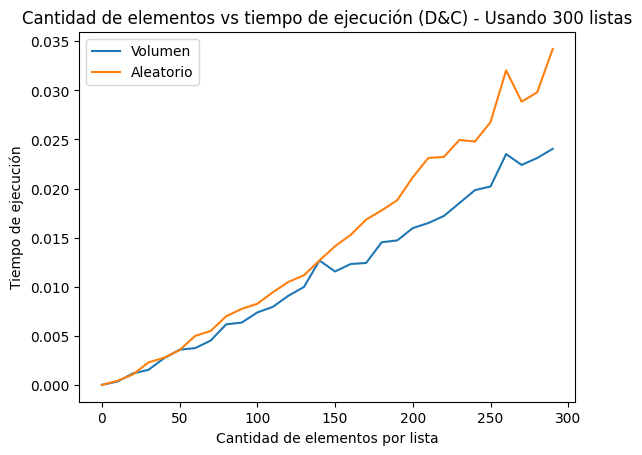

In [24]:
tiempos_dyc_volumen = obtener_tiempos_k_variable(cantidad_elementios, cantidades, k_merge_dyc, armar_lista_volumen)
tiempos_dyc_aleatorio = obtener_tiempos_k_variable(cantidad_elementios, cantidades, k_merge_dyc, armar_lista_aleatorias)

plt.plot(cantidades, tiempos_dyc_volumen, label='Volumen')
plt.plot(cantidades, tiempos_dyc_aleatorio, label='Aleatorio')
plt.title(f'Cantidad de elementos vs tiempo de ejecución (D&C) - Usando {nro_listas} listas')
plt.xlabel('Cantidad de elementos por lista')
plt.ylabel('Tiempo de ejecución')
plt.legend()
plt.show()

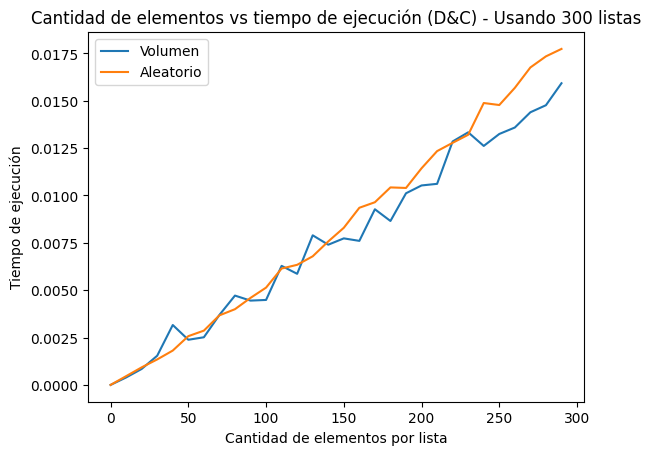

In [25]:
tiempos_dyc_volumen = obtener_tiempos_k_variable(cantidad_elementios, cantidades, k_merge_heap, armar_lista_volumen)
tiempos_dyc_aleatorio = obtener_tiempos_k_variable(cantidad_elementios, cantidades, k_merge_heap, armar_lista_aleatorias)

plt.plot(cantidades, tiempos_dyc_volumen, label='Volumen')
plt.plot(cantidades, tiempos_dyc_aleatorio, label='Aleatorio')
plt.title(f'Cantidad de elementos vs tiempo de ejecución (D&C) - Usando {nro_listas} listas')
plt.xlabel('Cantidad de elementos por lista')
plt.ylabel('Tiempo de ejecución')
plt.legend()
plt.show()

In [26]:
def obtener_tiempos_k_h_variable(cantidad_elementos, n_listas, k_merge, armar_lista):
    tiempos = []
    for cant_lista in n_listas:
        for cant_elem in cantidad_elementos:
            listas = armar_lista(cant_lista, cant_elem)
            start_time = time.time()
            k_merge(listas)  
            end_time = time.time()
            tiempos.append(end_time - start_time)  
    
    return tiempos

In [27]:
cantidad_elementios = 10
nro_listas = 10
saltos = 2

cantidades_listas = [i for i in range(0, nro_listas, saltos)]
cantidades_elementos = [i for i  in range(0, cantidad_elementios, saltos)]

In [ ]:
tiempos_dyc_volumen = obtener_tiempos_k_h_variable(cantidades_elementos, cantidades_listas, k_merge_dyc, armar_lista_volumen)
tiempos_dyc_aleatorio = obtener_tiempos_k_h_variable(cantidades_elementos, cantidades_listas, k_merge_dyc, armar_lista_aleatorias)

plt.plot(cantidades, tiempos_dyc_volumen, label='Volumen')
plt.plot(cantidades, tiempos_dyc_aleatorio, label='Aleatorio')
plt.title(f'Cantidad de elementos vs tiempo de ejecución (D&C) - Usando {nro_listas} listas')
plt.xlabel('Cantidad de elementos por lista')
plt.ylabel('Tiempo de ejecución')
plt.legend()
plt.show()

En base a los gráficos, se puede observar que el k_merge por heap terminó más rápido que el de división y conquista. La complejidad de nuestro algoritmo es O(n log n) y la de heap es O(n log k). Nos dimos cuenta que la k influye ya que al ser mucho menor que n, los gráficos 

Observamos que cuantas más listas se le pasan al k_merge, más se alinean los gráficos en ambas técnicas. De lo contrario, si se usan pocas listas el gráfico empieza a hacer saltos inesperados.

Con listas aleatorias, pueden ocurrir picos esporádicos pero más espaciados y con listas fijas hay menos oscilaciones pero están más juntas 

